## Do it! Natural Language Processing using BERT and GPT - part1
#### 한국어 자연어 처리에 관한 내용을 정리하였습니다. Do it! BERT와 GPT로 배우는 자연어 처리(이기창 지음)을 참고하였습니다.

## 1. 처음 만나는 자연어 처리
### 1.1 딥러닝 기반 자연어 처리 모델
#### 모델 : 입력을 받아 어떤 처리를 수행하는 함수, 출력은 확률 -> 모델은 입력이 특정 범주일 확률을 반환하는 확률 함수
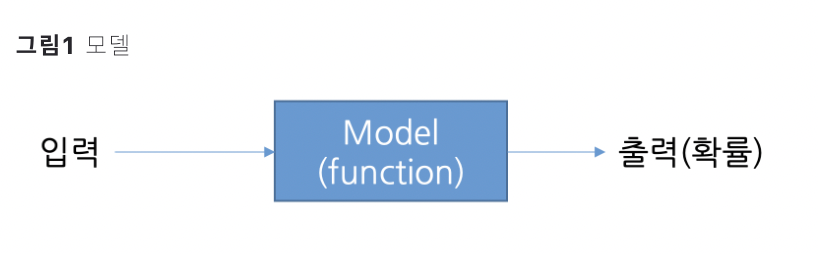

#### 자연어 처리 모델 : 자연어를 입력받아서 해당 입력이 특정 범주일 확률을 반환하는 확률 함수
#### 학습(train) : 모델이 라벨링된 학습 데이터를 통해 데이터의 패턴을 스스로 익히는 과정 -> 출력이 정답에 가까워지도록 모델을 업데이트 하는 과정

### 1.2 트랜스퍼 러닝(Transfer learning)
#### 트랜스퍼 러닝 : 특정 태스크를 학습한 모델을 다른 태스크 수행에 재사용하는 기법
#### 트랜스퍼 러닝 적용 시 기존보다 모델의 학습 속도가 빨라지고 새로운 태스크를 더 잘 수행하는 경향을 보임, BERT, GPT 등도 트랜스퍼 러닝이 적용
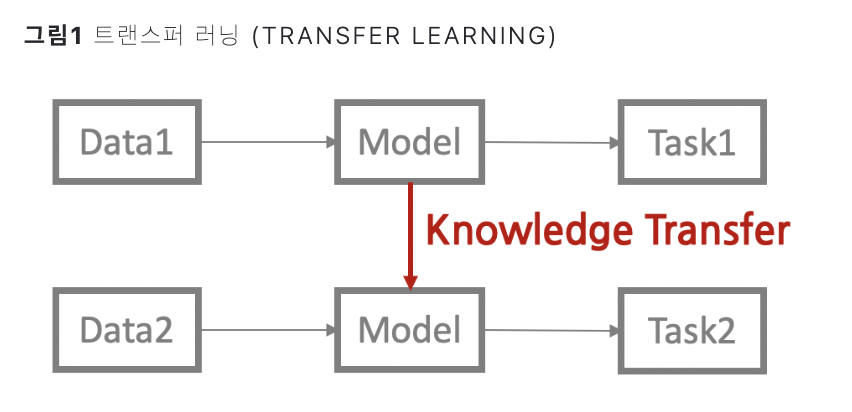
#### Task 1 -> 업스트림(Upstream) 태스크 : 대규모 말뭉치의 문맥을 이해하는 과제(ex. 다음 단어 맞추기, 빈칸 채우기) / Task 2 -> 다운스트림(Downstream) 태스크 : 풀고자하는 자연어 처리의 구체적 문제(ex. 문서 분류, 개체명 인식)
#### 프리트레인(Pretrain) : 업스트림 태스크를 학습하는 과정
#### 트랜스퍼 러닝이 주목 받은 이유 : 업스트림 태스크 + 프리트레인 -> 자연어의 풍부한 문맥을 모델에 내재화 후 다양한 다운스트림 태스크에 적용하여 성능 향상
#### GPT 계열 모델의 프리트레인 : 다음 단어 맞히기 업스트림 태스크 -> 다음 단어 맞히기로 업스트림 태스크를 수행한 모델 = 언어모델
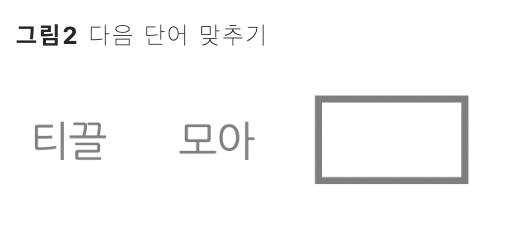
#### BERT 계열 모델의 프리트레인 : 빈칸 채우기 업스트림 태스크 -> 빈칸 채우기로 업스트림 태스크를 수행한 모델 = 마스크 언어 모델
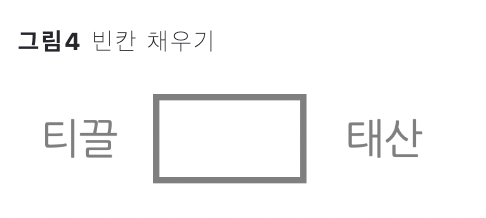

#### Self-supervised learning : 데이터 내에서 정답을 만들고 이를 바탕으로 모델을 학습하는 방법
#### 다운스트림 태스크 : 프리트레인을 마친 모델을 구조 변경 없이 그대로 사용 or 태스크 모듈을 덧붙인 형태로 수행 / 본질은 분류 문제
#### 파인튜닝(Fine tuning) : 프리트레인을 마친 모델을 다운스트림 태스크에 맞게 업데이트
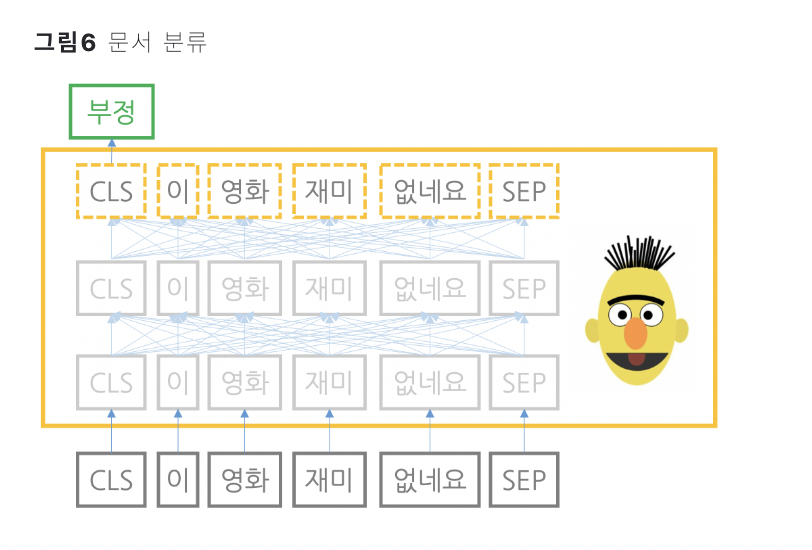
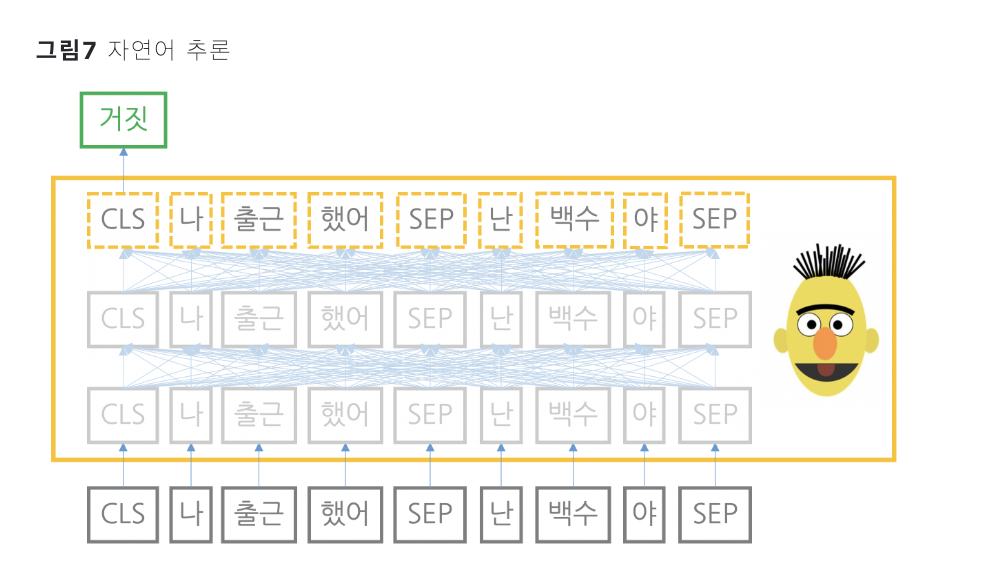
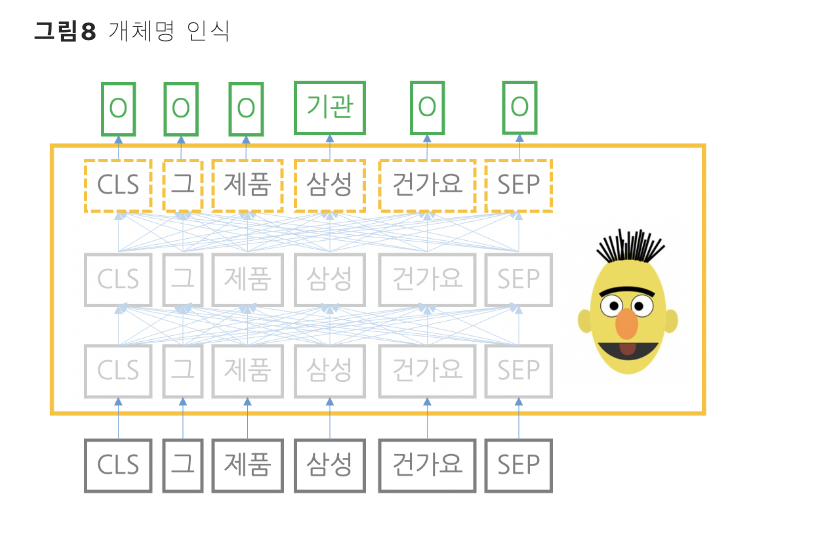
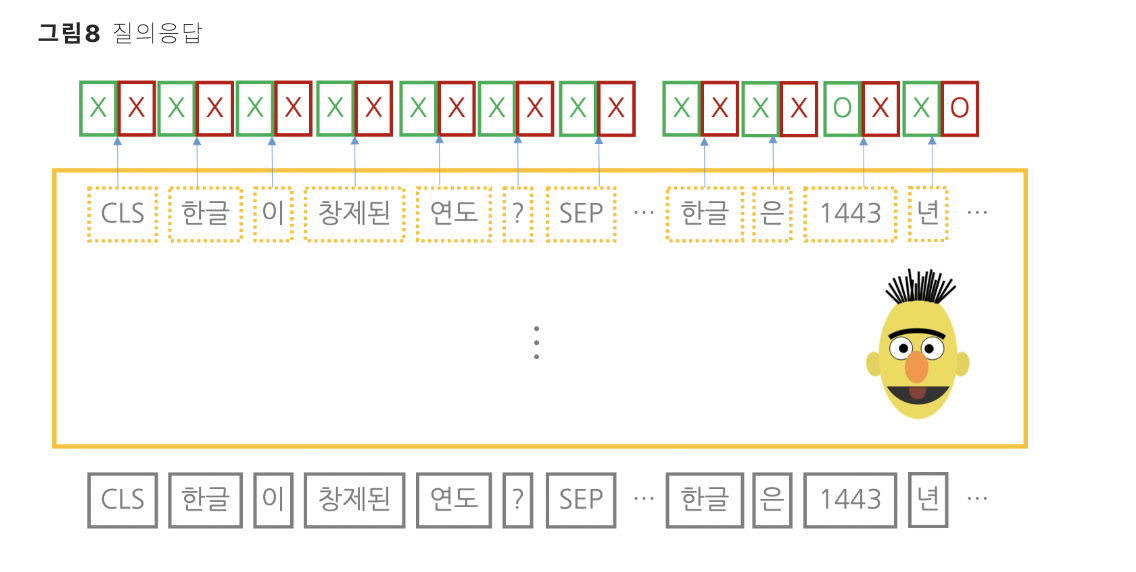
#### 문장 생성은 주로 GPT 계열 모델 활용 / 그 외 task들은 BERT 계열 모델 활용
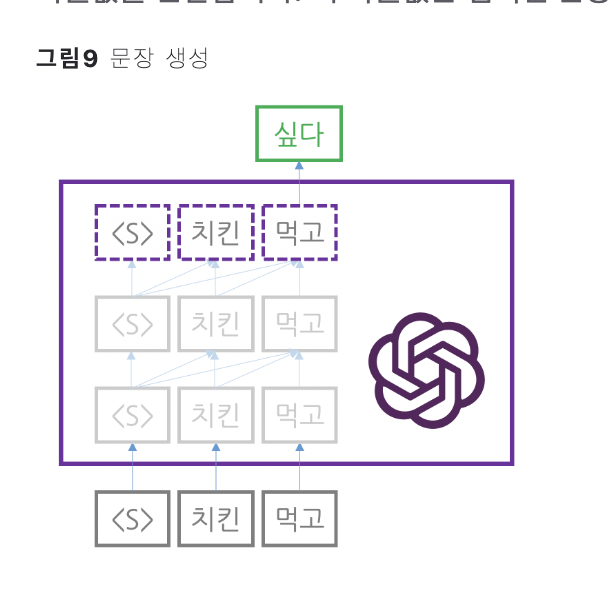

------------
------------
#### 다운스트림 태스크 학습 방법 3가지
#### 1. 파인튜닝(fine tuning) : 다운스트림 태스크 데이터 전체를 사용 / 다운스트림 데이터에 맞게 모델 전체를 업데이트
#### 2. 프롬프트 튜닝(prompt tuning) : 다운스트림 태스크 데이터 전체를 사용 / 다운스트림 데이터에 맞게 모델 일부를 업데이트
#### 3. 인컨텍스트 러닝(in-context learning) : 다운스트림 태스트 데이터 일부 사용 / 모델을 업데이트하지 않음
#### 3.1 제로샷 러닝(zero-shot learning) : 다운스트림 태스크 데이터를 전혀 사용하지 않음 / 모델이 바로 다운스트림 태스크 수행
#### 3.2 원샷 러닝(one-shot learning) : 다운스트림 태스크 데이터를 1건만 사용 / 1건의 데이터가 어떻게 수행되는 지 참고 후 다운스트림 태스크 수행
#### 3.3 퓨샷 러닝(few-shot learning) : 다운스트림 태스크 데이터 몇 건을 사용 / 몇 건의 데이터가 어떻게 수행되는 지 참고 후 다운스트림 태스크 수행
------------
------------

### 1.3 학습 파이프라인 소개
#### 각종 설정값 정하기 -> 데이터 내려받기 -> 프리트레인을 마친 모델 준비 -> 토크나이저 준비 -> 데이터 로데 준비 -> 태스크 정의 -> 모델 학습

#### - 각종 설정값 정하기 : 하이퍼파라미터 설정

In [ ]:
from ratsnlp.nlpbook.classification import ClassificationTrainArguments
args = ClassificationTrainArguments(
pretrained_model_name = 'beomi/kcbert-base',
downstream_corpus_name='nsmc',
downstream_corpus_root_dir='./corpora',
downstream_model_dir='./model',
learning_rate=5e-5,
batch_size=32)

#### - 데이터 내려받기 : NSMC(네이버 영화 리뷰 말뭉치)

In [2]:
from Korpora import Korpora
Korpora.fetch(corpus_name = args.downstream_corpus_name, root_dir=args.downstream_corpus_root_dir, force_download=True)

[nsmc] download ratings_train.txt: 14.6MB [00:02, 5.45MB/s]                            
[nsmc] download ratings_test.txt: 4.90MB [00:01, 3.57MB/s]                            


#### - 프리트레인을 마친 모델 준비: kcbert-base 모델

In [4]:
from transformers import BertConfig, BertForSequenceClassification
pretrained_model_config = BertConfig.from_pretrained(args.pretrained_model_name, num_labes=2)
model = BertForSequenceClassification(config = pretrained_model_config)

#### - 토크나이저 준비하기 : kcbert-base 모델이 사용하는 토크나이저

#### 토큰 : 문장보다 작은 단위
#### 토큰화 : 문장을 토큰 시퀀스로 분석하는 과정
#### 토크나이저 : 토큰화를 수행하는 프로그램 ex. BPE, Wordpiece

In [6]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(args.pretrained_model_name, do_lower_case = False)

Downloading:   0%|          | 0.00/250k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

#### - 데이터로더 준비하기
#### - 데이터로더 : 데이터를 배치 단위로 모델에 밀어 넣어주는 역할
#### - 데이터셋 : 데이터로더의 구성 요소 중 하나 
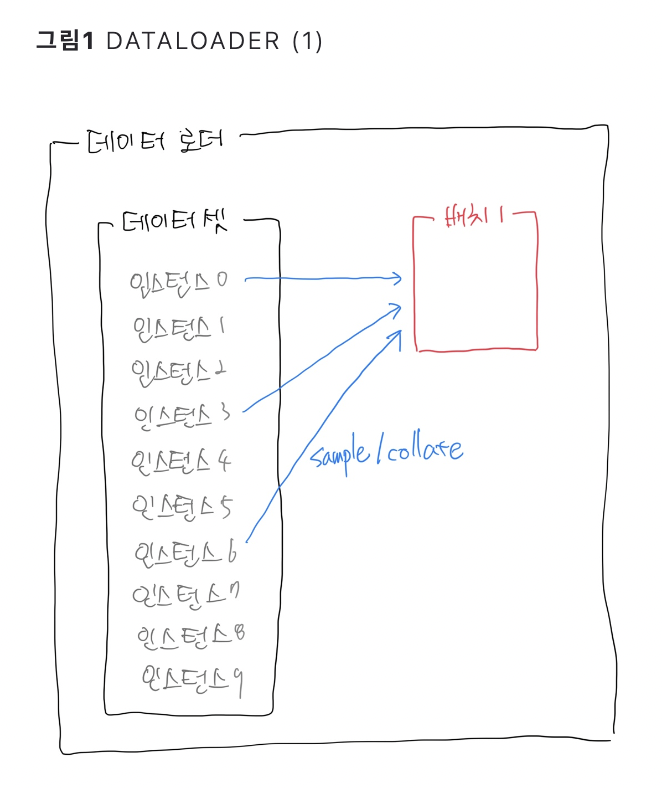
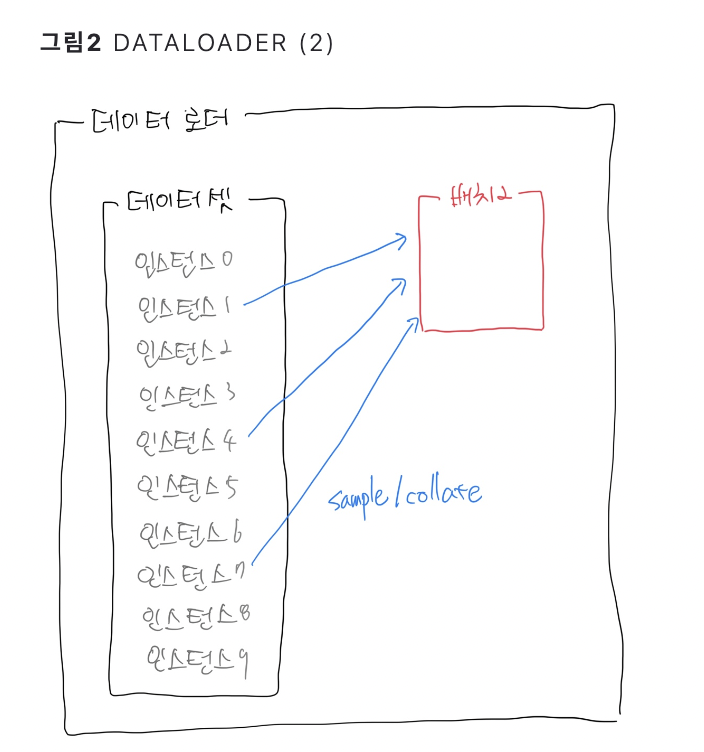
#### - Collate : 배치의 모양 등을 정비해 모델의 최종 입력으로 만들어주는 과정
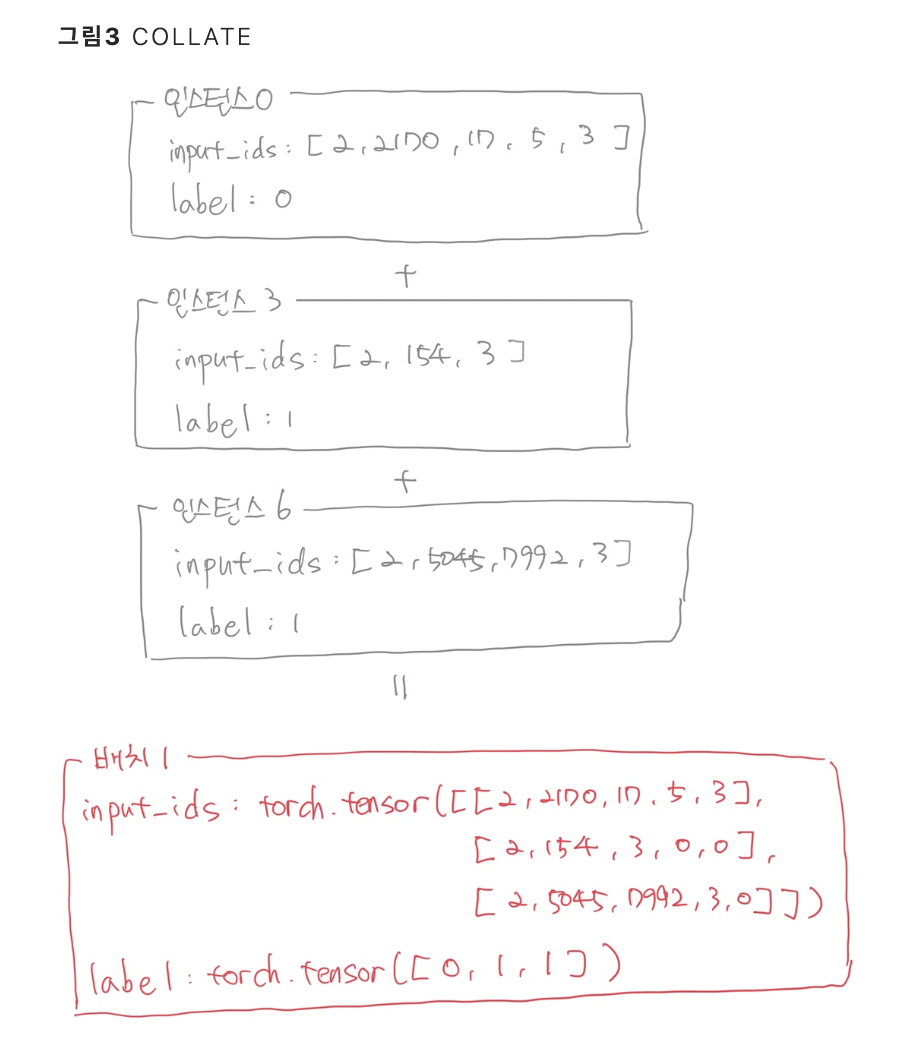

In [9]:
from torch.utils.data import DataLoader, RandomSampler
from ratsnlp.nlpbook.classification import NsmcCorpus, ClassificationDataset
from ratsnlp.nlpbook import data_collator

corpus = NsmcCorpus()
train_dataset = ClassificationDataset(args=args, corpus=corpus, tokenizer=tokenizer, mode='train')
train_dataloader = DataLoader(
train_dataset, 
batch_size=args.batch_size,
sampler=RandomSampler(train_dataset, replacement=False),
collate_fn=data_collator,
drop_last=False,
num_workers=args.cpu_workers)

#### - 태스크 정의하기
#### 파이토치 라이트닝 : 딥러닝 모델을 학습할 때 반복적인 내용을 대신 수행해줘 사용자가 모델 구축에만 신경쓸 수 있도록 도움을 주는 라이브러리
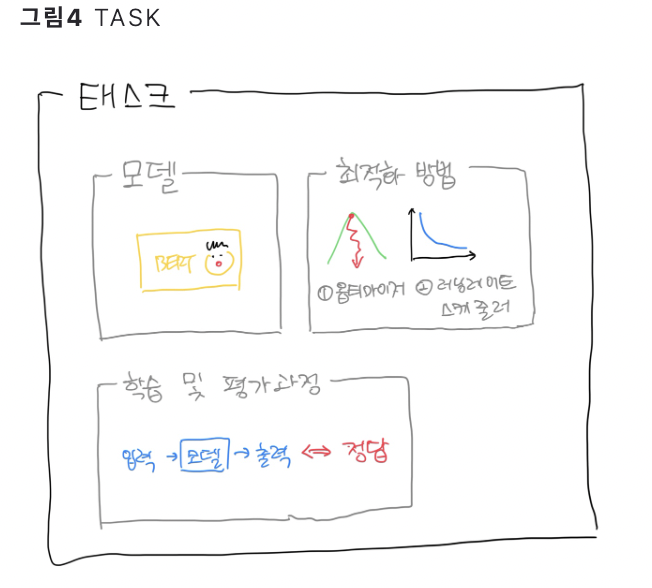

#### - 모델 학습하기 
#### 트레이너(trainer) : 파이토치 라이트닝에서 제공하는 객체로 실제 학습을 수행, GPU 등 하드웨어 설정, 학습 기록 로깅, 체크포인트 저장 등 복잡한 설정들을 알아서 수행

In [ ]:
from ratsnlp.nlpbook import get_trainer
from ratsnlp.nlpbook.classification import ClassificationTask
task = ClassificationTask(model, args)
trainer = get_trainer(args)
trainer.fit(task, train_dataloaders=train_dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/pytorch_lightning/trainer/configuration_validator.py:133: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.")
Missing logger folder: /Users/qook/Python/3.7/model/lightning_logs
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/pytorch_lightning/core/optimizer.py:381: RuntimeWarning: Found unsupported keys in the optimizer configuration: {'scheduler'}
  f"Found unsupported keys in the optimizer configuration: {set(extra_keys)}", category=RuntimeWarning

  | Name  | Type                          | Params
--------------------------------------------------------
0 | model | BertForSequenceClassification | 108 M 
--------------------------------

Training: 0it [00:00, ?it/s]